In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
round2=pd.read_csv('C:\\Users\\Shubham PC\\Desktop\\ishan sir DS Notes\\Spark Funds Industrial Assignment - 1\\rounds2.csv',encoding='ISO-8859-1')
round2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/ÃASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

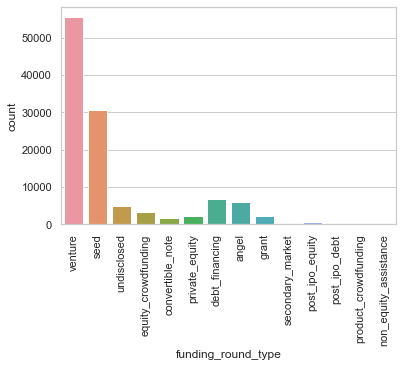

In [143]:
sns.countplot(round2['funding_round_type'])
plt.xticks(rotation=90)

In [3]:

#convert the company permalink data into lower case for checking the unique companies in rounds2 
round2['company_permalink']=round2['company_permalink'].apply(lambda x:x.lower())
round2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [4]:
round2['company_permalink']=round2['company_permalink'].apply(lambda x:x.encode('utf-8').decode('ascii','ignore'))
round2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [5]:
#check unique companies
round2['company_permalink'].nunique()

66368

In [6]:
#load companies data file
companies = pd.read_csv(r"C:\Users\Shubham PC\Desktop\ishan sir DS Notes\Spark Funds Industrial Assignment - 1\companies.txt",encoding='ISO-8859-1',delimiter='\t')
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [7]:
companies

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/ÃEron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/ÃAsys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [8]:
companies['permalink']=companies['permalink'].apply(lambda x: x.lower())

In [9]:
companies['permalink'] = companies['permalink'].apply(lambda x:x.encode('utf-8').decode('ascii','ignore'))

In [10]:
companies['status']

0        operating
1        operating
2        operating
3        operating
4        operating
           ...    
66363    operating
66364    operating
66365    operating
66366    operating
66367    operating
Name: status, Length: 66368, dtype: object

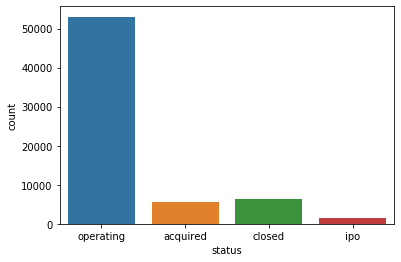

In [103]:
sns.countplot(companies['status'])

In [102]:
companies['status'].unique()

array(['operating', 'acquired', 'closed', 'ipo'], dtype=object)

In [11]:
companies['permalink'].nunique()

66368

In [12]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [13]:
companies.isna().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

##### As permalink and status column has no null values ,but status has repeatitive data,so permalink column will become unique key for each company#####

In [14]:
master_frame=pd.merge(companies,round2,how='inner',left_on='permalink',right_on='company_permalink')
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [15]:
master_frame.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')

In [16]:
master_frame.drop(labels=['company_permalink','funding_round_code'],axis=1,inplace=True)

In [17]:
master_frame.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'funding_round_permalink', 'funding_round_type', 'funded_at',
       'raised_amount_usd'],
      dtype='object')

In [18]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114949 non-null  object 
 1   name                     114948 non-null  object 
 2   homepage_url             108815 non-null  object 
 3   category_list            111539 non-null  object 
 4   status                   114949 non-null  object 
 5   country_code             106271 non-null  object 
 6   state_code               104003 non-null  object 
 7   region                   104782 non-null  object 
 8   city                     104785 non-null  object 
 9   founded_at               94428 non-null   object 
 10  funding_round_permalink  114949 non-null  object 
 11  funding_round_type       114949 non-null  object 
 12  funded_at                114949 non-null  object 
 13  raised_amount_usd        94959 non-null   float64
dtypes: f

In [19]:
#check the empty data in the form of percentage
round(100*(master_frame.isnull().sum())/len(master_frame.index))

permalink                   0.0
name                        0.0
homepage_url                5.0
category_list               3.0
status                      0.0
country_code                8.0
state_code                 10.0
region                      9.0
city                        9.0
founded_at                 18.0
funding_round_permalink     0.0
funding_round_type          0.0
funded_at                   0.0
raised_amount_usd          17.0
dtype: float64

## Funding Type Analysis##

In [20]:
master_frame['funding_round_type'].unique()

array(['venture', 'seed', 'undisclosed', 'equity_crowdfunding',
       'convertible_note', 'private_equity', 'debt_financing', 'angel',
       'grant', 'secondary_market', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'non_equity_assistance'], dtype=object)

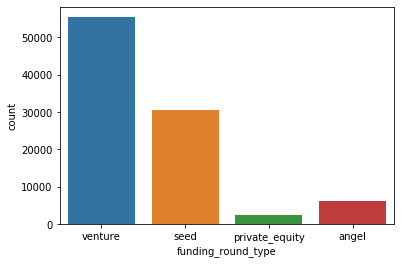

In [104]:
sns.countplot(master_frame['funding_round_type'])

In [21]:
funding_round_type_lst = ['seed','angel','venture','private_equity']
master_frame=master_frame[master_frame['funding_round_type'].isin(funding_round_type_lst)]
master_frame.head()


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0


In [22]:
master_frame_by_funding=master_frame.groupby(by='funding_round_type')
master_frame_by_funding=master_frame_by_funding['raised_amount_usd'].mean().sort_values(ascending=False).apply(lambda x: '{:.1f}'.format(x))
master_frame_by_funding

funding_round_type
private_equity    73308593.0
venture           11748949.1
angel               958694.5
seed                719818.0
Name: raised_amount_usd, dtype: object

In [23]:
funding = pd.DataFrame(master_frame_by_funding,dtype=np.float)
investment_type=funding[(funding['raised_amount_usd']>=5000000.0) & (funding['raised_amount_usd']<=15000000.0)]
investment_type.index

Index(['venture'], dtype='object', name='funding_round_type')

## Country Analysis##

In [24]:
import lxml

In [25]:
import html5lib

In [26]:
internet_link = pd.read_html('https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language')

In [27]:
internet_link

[   Nr         Country Alpha-3 code                 Region  Population  \
 0   1       Australia          AUS                Oceania    25019600   
 1   2  New Zealand[1]          NZL                Oceania     4893830   
 2   3  United Kingdom          GBR                 Europe    66040229   
 3   4   United States          USA  North America/Oceania   328239523   
 
   Primary language?  
 0               Yes  
 1               Yes  
 2               Yes  
 3               Yes  ,
     Nr                               Country Alpha-3 code  \
 0    1                Antigua and Barbuda[2]          ATG   
 1    2                            Bahamas[2]          BHS   
 2    3                           Barbados[3]          BRB   
 3    4                             Belize[4]          BLZ   
 4    5                           Botswana[4]          BWA   
 5    6                            Burundi[5]          BDI   
 6    7                           Cameroon[2]          CMR   
 7    8         

In [28]:
table1=internet_link[0]
table1.head()

,Nr,Country,Alpha-3 code,Region,Population,Primary language?
0,1,Australia,AUS,Oceania,25019600,Yes
1,2,New Zealand[1],NZL,Oceania,4893830,Yes
2,3,United Kingdom,GBR,Europe,66040229,Yes
3,4,United States,USA,North America/Oceania,328239523,Yes


In [29]:
table2=internet_link[1]
table1.head()

,Nr,Country,Alpha-3 code,Region,Population,Primary language?
0,1,Australia,AUS,Oceania,25019600,Yes
1,2,New Zealand[1],NZL,Oceania,4893830,Yes
2,3,United Kingdom,GBR,Europe,66040229,Yes
3,4,United States,USA,North America/Oceania,328239523,Yes


In [30]:

countries_df = pd.merge(table1,table2,how='outer')
countries_df

,Nr,Country,Alpha-3 code,Region,Population,Primary language?,Population1
0,1,Australia,AUS,Oceania,25019600.0,Yes,NaN
1,2,New Zealand[1],NZL,Oceania,4893830.0,Yes,NaN
2,3,United Kingdom,GBR,Europe,66040229.0,Yes,NaN
3,4,United States,USA,North America/Oceania,328239523.0,Yes,NaN
4,1,Antigua and Barbuda[2],ATG,Caribbean,NaN,Yes,85000
5,2,Bahamas[2],BHS,Caribbean,NaN,Yes,331000
6,3,Barbados[3],BRB,Caribbean,NaN,Yes,294000
7,4,Belize[4],BLZ,Central America,NaN,Yes,288000
8,5,Botswana[4],BWA,Africa,NaN,No,1882000
9,6,Burundi[5],BDI,Africa,NaN,No,10114505


In [31]:
countries_df.columns

Index(['Nr', 'Country', 'Alpha-3 code', 'Region', 'Population',
       'Primary language?', 'Population1'],
      dtype='object')

In [32]:
countries_df.drop(labels=['Nr','Region','Population','Population1'],axis=1,inplace=True)

In [33]:
countries_df.drop(['Country'],axis=1,inplace=True)

In [34]:
countries_df.columns

Index(['Alpha-3 code', 'Primary language?'], dtype='object')

In [35]:
countries_df

,Alpha-3 code,Primary language?
0,AUS,Yes
1,NZL,Yes
2,GBR,Yes
3,USA,Yes
4,ATG,Yes
5,BHS,Yes
6,BRB,Yes
7,BLZ,Yes
8,BWA,No
9,BDI,No


In [36]:
countries_df.rename(columns={'Alpha-3 code':'country_code','Primary language?':'primary_language'},inplace=True)
countries_df.head()

,country_code,primary_language
0,AUS,Yes
1,NZL,Yes
2,GBR,Yes
3,USA,Yes
4,ATG,Yes


In [37]:
countries_df.tail()

,country_code,primary_language
55,TUV,No
56,UGA,No (but official and educational)[25]
57,VUT,No
58,ZMB,No
59,ZWE,No (used as lingua franca)


In [38]:
countries_df['primary_language']= countries_df['primary_language'].apply(lambda x:x.split()[0])
countries_df

,country_code,primary_language
0,AUS,Yes
1,NZL,Yes
2,GBR,Yes
3,USA,Yes
4,ATG,Yes
5,BHS,Yes
6,BRB,Yes
7,BLZ,Yes
8,BWA,No
9,BDI,No


In [39]:
countries_df.tail()

,country_code,primary_language
55,TUV,No
56,UGA,No
57,VUT,No
58,ZMB,No
59,ZWE,No


In [40]:
countries_df=countries_df[(countries_df['primary_language']=='Yes') | (countries_df['primary_language']=='No')]

In [41]:
len(countries_df)

60

In [42]:
master_frame_ft=master_frame.loc[master_frame['funding_round_type'].isin(investment_type.index)]
master_frame_ft.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,NaN


In [43]:
master_frame_ft.tail()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
114934,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.0
114936,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,16-12-2004,8500000.0
114937,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,29-01-2013,2686600.0
114941,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN,/funding-round/171693e1e07e0230defd8fddb6de4515,venture,01-04-2012,1587301.0
114946,/organization/eron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,01-08-2014,NaN


In [44]:
master_frame_ft['funding_round_type'].unique()

array(['venture'], dtype=object)

In [45]:
master_frame_ft.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'funding_round_permalink', 'funding_round_type', 'funded_at',
       'raised_amount_usd'],
      dtype='object')

In [46]:
master_frame_ft=pd.merge(master_frame_ft,countries_df,left_on='country_code',right_on='country_code')
master_frame_ft

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_language
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,No
1,/organization/1000lookz,1000Lookz,http://1000lookz.com,Beauty,operating,IND,25,Chennai,Chennai,01-01-2008,/funding-round/e07f6e580046d00c7aeb33fafb9d90a3,venture,22-07-2013,NaN,No
2,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6369507.0,No
3,/organization/247-learning-private,24x7 Learning,http://www.24x7learning.com,EdTech|Education|Systems,operating,IND,19,Bangalore,Bangalore,01-01-2001,/funding-round/4cd5cd165bc869bc40705a9e4b626bee,venture,06-11-2007,4000000.0,No
4,/organization/3dsoc,3DSoC,http://www.3dsoc.com,3D|Mobile,operating,IND,19,Bangalore,Bangalore,01-06-2006,/funding-round/bbedf1410fddeed341018583bbd0ca1e,venture,01-12-2007,1240000.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43960,/organization/pivot-works,Pivot Works,http://www.pivotworks.co/,Human Resources,operating,RWA,1,Kigali,Kigali,NaN,/funding-round/eabead27fb63e35737aefb08866700f4,venture,04-02-2014,NaN,No
43961,/organization/pivot-works,Pivot Works,http://www.pivotworks.co/,Human Resources,operating,RWA,1,Kigali,Kigali,NaN,/funding-round/f64250816d835bff7a39dba350fecac9,venture,04-05-2012,NaN,No
43962,/organization/solarnow,SolarNOW,http://solarnow.eu/,Solar,operating,UGA,37,Kampala,Kampala,01-01-2011,/funding-round/fba88f950f8a45c8dfcc5a8218addcd7,venture,10-10-2014,2500000.0,No
43963,/organization/uafric,uAfrica,http://www.uafrica.com/,E-Commerce,operating,BWA,9,NaN,NaN,01-01-2004,/funding-round/21dbb4241306f1f2def275d3853d2a55,venture,15-05-2014,1500000.0,No


In [47]:
master_frame_by_country = master_frame_ft.groupby(by='country_code')
total_funding = master_frame_by_country['raised_amount_usd'].sum().sort_values(ascending=False).apply(lambda x: '{:.1f}'.format(x)).head(9)
total_funding

country_code
USA    422510842796.0
GBR     20245627416.0
IND     14391858718.0
CAN      9583332317.0
SGP      2793917856.0
IRL      1676131350.0
AUS      1322934948.0
NZL       448316383.0
NGA       245440000.0
Name: raised_amount_usd, dtype: object

In [48]:
top9=pd.DataFrame(data=total_funding)
top9

,raised_amount_usd
country_code,
USA,422510842796.0
GBR,20245627416.0
IND,14391858718.0
CAN,9583332317.0
SGP,2793917856.0
IRL,1676131350.0
AUS,1322934948.0
NZL,448316383.0
NGA,245440000.0


In [49]:
top9.head(3)

,raised_amount_usd
country_code,
USA,422510842796.0
GBR,20245627416.0
IND,14391858718.0


## Sector Analysis##

In [50]:
master_frame_ft=master_frame_ft.loc[master_frame_ft['country_code'].isin(top9.index[:3])]
master_frame_ft



,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_language
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,No
1,/organization/1000lookz,1000Lookz,http://1000lookz.com,Beauty,operating,IND,25,Chennai,Chennai,01-01-2008,/funding-round/e07f6e580046d00c7aeb33fafb9d90a3,venture,22-07-2013,NaN,No
2,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6369507.0,No
3,/organization/247-learning-private,24x7 Learning,http://www.24x7learning.com,EdTech|Education|Systems,operating,IND,19,Bangalore,Bangalore,01-01-2001,/funding-round/4cd5cd165bc869bc40705a9e4b626bee,venture,06-11-2007,4000000.0,No
4,/organization/3dsoc,3DSoC,http://www.3dsoc.com,3D|Mobile,operating,IND,19,Bangalore,Bangalore,01-06-2006,/funding-round/bbedf1410fddeed341018583bbd0ca1e,venture,01-12-2007,1240000.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43008,/organization/zubka,Zubka,http://www.zubka.com,Consulting,closed,GBR,B9,NaN,NaN,01-01-2006,/funding-round/37fbbea761f614e5a3254d314cb2eba1,venture,09-02-2007,3919186.0,Yes
43009,/organization/zutux,Zutux,http://www.zutux.com,E-Commerce|Furniture,operating,GBR,I2,Manchester,Manchester,NaN,/funding-round/281d898f0e2f5d0d964fbde6f3a10313,venture,16-04-2012,1503926.0,Yes
43010,/organization/zyncd,Zyncd,http://www.zyncd.com,Crowdsourcing|Knowledge Management,operating,GBR,H9,London,London,01-01-2014,/funding-round/3549f5a481f83610044a4226926acf5a,venture,01-09-2014,144451.0,Yes
43011,/organization/zynstra,Zynstra,http://www.zynstra.com,Software,operating,GBR,A4,Bath,Bath,30-11-2011,/funding-round/05f43b37c270f5919578281ce803de8f,venture,09-07-2014,8400000.0,Yes


In [51]:
master_frame_ft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41667 entries, 0 to 43012
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                41667 non-null  object 
 1   name                     41667 non-null  object 
 2   homepage_url             39706 non-null  object 
 3   category_list            41283 non-null  object 
 4   status                   41667 non-null  object 
 5   country_code             41667 non-null  object 
 6   state_code               41588 non-null  object 
 7   region                   41494 non-null  object 
 8   city                     41494 non-null  object 
 9   founded_at               34729 non-null  object 
 10  funding_round_permalink  41667 non-null  object 
 11  funding_round_type       41667 non-null  object 
 12  funded_at                41667 non-null  object 
 13  raised_amount_usd        39018 non-null  float64
 14  primary_language      

In [52]:
round(100*(master_frame_ft.isnull().sum())/len(master_frame_ft.index))

permalink                   0.0
name                        0.0
homepage_url                5.0
category_list               1.0
status                      0.0
country_code                0.0
state_code                  0.0
region                      0.0
city                        0.0
founded_at                 17.0
funding_round_permalink     0.0
funding_round_type          0.0
funded_at                   0.0
raised_amount_usd           6.0
primary_language            0.0
dtype: float64

In [53]:
master_frame_ft=master_frame_ft[master_frame_ft['category_list'].notnull()]
master_frame_ft

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_language
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,No
1,/organization/1000lookz,1000Lookz,http://1000lookz.com,Beauty,operating,IND,25,Chennai,Chennai,01-01-2008,/funding-round/e07f6e580046d00c7aeb33fafb9d90a3,venture,22-07-2013,NaN,No
2,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6369507.0,No
3,/organization/247-learning-private,24x7 Learning,http://www.24x7learning.com,EdTech|Education|Systems,operating,IND,19,Bangalore,Bangalore,01-01-2001,/funding-round/4cd5cd165bc869bc40705a9e4b626bee,venture,06-11-2007,4000000.0,No
4,/organization/3dsoc,3DSoC,http://www.3dsoc.com,3D|Mobile,operating,IND,19,Bangalore,Bangalore,01-06-2006,/funding-round/bbedf1410fddeed341018583bbd0ca1e,venture,01-12-2007,1240000.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43008,/organization/zubka,Zubka,http://www.zubka.com,Consulting,closed,GBR,B9,NaN,NaN,01-01-2006,/funding-round/37fbbea761f614e5a3254d314cb2eba1,venture,09-02-2007,3919186.0,Yes
43009,/organization/zutux,Zutux,http://www.zutux.com,E-Commerce|Furniture,operating,GBR,I2,Manchester,Manchester,NaN,/funding-round/281d898f0e2f5d0d964fbde6f3a10313,venture,16-04-2012,1503926.0,Yes
43010,/organization/zyncd,Zyncd,http://www.zyncd.com,Crowdsourcing|Knowledge Management,operating,GBR,H9,London,London,01-01-2014,/funding-round/3549f5a481f83610044a4226926acf5a,venture,01-09-2014,144451.0,Yes
43011,/organization/zynstra,Zynstra,http://www.zynstra.com,Software,operating,GBR,A4,Bath,Bath,30-11-2011,/funding-round/05f43b37c270f5919578281ce803de8f,venture,09-07-2014,8400000.0,Yes


In [54]:
round(100*(master_frame_ft.isnull().sum())/len(master_frame_ft.index))

permalink                   0.0
name                        0.0
homepage_url                5.0
category_list               0.0
status                      0.0
country_code                0.0
state_code                  0.0
region                      0.0
city                        0.0
founded_at                 16.0
funding_round_permalink     0.0
funding_round_type          0.0
funded_at                   0.0
raised_amount_usd           6.0
primary_language            0.0
dtype: float64

In [55]:
master_frame_ft['category_list']=master_frame_ft['category_list'].apply(lambda x:x.split('|')[0])
master_frame_ft.head()

C:\Users\Shubham PC\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_language
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,No
1,/organization/1000lookz,1000Lookz,http://1000lookz.com,Beauty,operating,IND,25,Chennai,Chennai,01-01-2008,/funding-round/e07f6e580046d00c7aeb33fafb9d90a3,venture,22-07-2013,NaN,No
2,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6369507.0,No
3,/organization/247-learning-private,24x7 Learning,http://www.24x7learning.com,EdTech,operating,IND,19,Bangalore,Bangalore,01-01-2001,/funding-round/4cd5cd165bc869bc40705a9e4b626bee,venture,06-11-2007,4000000.0,No
4,/organization/3dsoc,3DSoC,http://www.3dsoc.com,3D,operating,IND,19,Bangalore,Bangalore,01-06-2006,/funding-round/bbedf1410fddeed341018583bbd0ca1e,venture,01-12-2007,1240000.0,No


In [56]:
mapping=pd.read_csv(r"C:\Users\Shubham PC\Desktop\ishan sir DS Notes\Spark Funds Industrial Assignment - 1\mapping.csv")
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [57]:
mapping_melt_frame=pd.melt(mapping,id_vars=['category_list'],var_name='main_sector')
mapping_melt_frame=mapping_melt_frame[mapping_melt_frame['value']==1]


In [58]:
mapping_melt_frame

,category_list,main_sector,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1
...,...,...,...
6121,Social Recruiting,"Social, Finance, Analytics, Advertising",1
6122,Social Television,"Social, Finance, Analytics, Advertising",1
6123,Social Travel,"Social, Finance, Analytics, Advertising",1
6134,Stock Exchanges,"Social, Finance, Analytics, Advertising",1


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

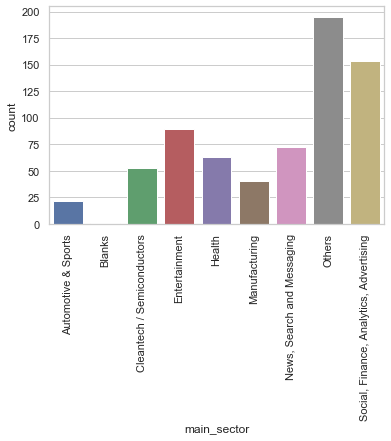

In [138]:
sns.countplot(x=mapping_melt_frame['main_sector'])
plt.xticks(rotation=90)

In [59]:
merged_frame_ft=pd.merge(master_frame_ft,mapping_melt_frame,on='category_list')
merged_frame_ft

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_language,main_sector,value
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,No,Entertainment,1
1,/organization/manas-informatics,Manas Informatic,http://www.topnews.in,Media,operating,IND,23,Mohali,Mohali,05-05-2007,/funding-round/719e50301803d3918ffa558fc877e41c,venture,02-02-2008,160000.0,No,Entertainment,1
2,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,Yes,Entertainment,1
3,/organization/audiosocket,Audiosocket,http://audiosocket.com,Media,operating,USA,WA,Seattle,Seattle,01-05-2008,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,02-05-2013,650000.0,Yes,Entertainment,1
4,/organization/audiosocket,Audiosocket,http://audiosocket.com,Media,operating,USA,WA,Seattle,Seattle,01-05-2008,/funding-round/4e3a53eec6c609943df752206070b23f,venture,02-09-2009,750000.0,Yes,Entertainment,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38426,/organization/skin-analytics,Skin Analytics,http://www.skin-analytics.com,mHealth,operating,GBR,C3,London,Cambridge,01-05-2012,/funding-round/0c460261c5ecec838366d32359dc2075,venture,09-07-2014,100000.0,Yes,Health,1
38427,/organization/stingray-geophysical,Stingray Geophysical,http://www.stingraygeo.com,Gas,operating,GBR,N7,London,Guildford,NaN,/funding-round/3303f9c6427e675f96ab85083c751a8d,venture,10-11-2006,1300000.0,Yes,Cleantech / Semiconductors,1
38428,/organization/stingray-geophysical,Stingray Geophysical,http://www.stingraygeo.com,Gas,operating,GBR,N7,London,Guildford,NaN,/funding-round/64ec067f3ff21259e3d1463112c1db61,venture,27-05-2010,4570000.0,Yes,Cleantech / Semiconductors,1
38429,/organization/stingray-geophysical,Stingray Geophysical,http://www.stingraygeo.com,Gas,operating,GBR,N7,London,Guildford,NaN,/funding-round/6fdf5c9dc4be9d883a18fdbbe00c6209,venture,23-03-2006,11460000.0,Yes,Cleantech / Semiconductors,1


In [60]:
merged_frame_ft['main_sector'].unique()

array(['Entertainment', 'Health', 'Others', 'Manufacturing',
       'Social, Finance, Analytics, Advertising',
       'Cleantech / Semiconductors', 'Automotive & Sports',
       'News, Search and Messaging'], dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

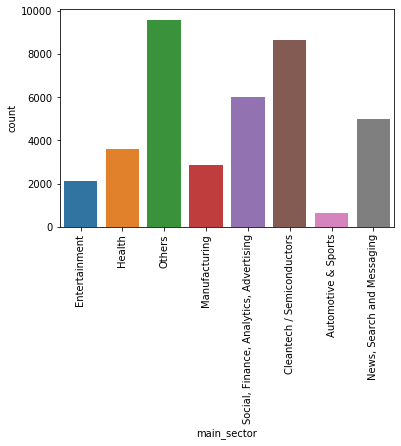

In [114]:
sns.countplot(merged_frame_ft['main_sector'])
plt.xticks(rotation=90)

In [61]:
merged_frame_ft['main_sector'].nunique()

8

In [62]:
merged_frame_ft.drop(labels=['value','primary_language'],axis=1,inplace=True)

In [63]:
merged_frame_ft.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'funding_round_permalink', 'funding_round_type', 'funded_at',
       'raised_amount_usd', 'main_sector'],
      dtype='object')

In [64]:
merged_frame_ft.head(8)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Entertainment
1,/organization/manas-informatics,Manas Informatic,http://www.topnews.in,Media,operating,IND,23,Mohali,Mohali,05-05-2007,/funding-round/719e50301803d3918ffa558fc877e41c,venture,02-02-2008,160000.0,Entertainment
2,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,Entertainment
3,/organization/audiosocket,Audiosocket,http://audiosocket.com,Media,operating,USA,WA,Seattle,Seattle,01-05-2008,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,02-05-2013,650000.0,Entertainment
4,/organization/audiosocket,Audiosocket,http://audiosocket.com,Media,operating,USA,WA,Seattle,Seattle,01-05-2008,/funding-round/4e3a53eec6c609943df752206070b23f,venture,02-09-2009,750000.0,Entertainment
5,/organization/audiosocket,Audiosocket,http://audiosocket.com,Media,operating,USA,WA,Seattle,Seattle,01-05-2008,/funding-round/bc0b412cf2fa7b739e4105ad756b47a4,venture,15-02-2012,1582300.0,Entertainment
6,/organization/babble,Babble,http://www.babble.com,Media,acquired,USA,NY,New York City,New York,01-12-2006,/funding-round/43cc678b39be3e684bb88501af05ff9b,venture,05-02-2009,2000000.0,Entertainment
7,/organization/babble,Babble,http://www.babble.com,Media,acquired,USA,NY,New York City,New York,01-12-2006,/funding-round/5fdb3dbeeb6eea0243702adc372130f3,venture,12-05-2009,1250000.0,Entertainment


## Checkpoint 5: Sector Analysis 2##

In [65]:
d1=pd.DataFrame(merged_frame_ft[(merged_frame_ft['raised_amount_usd']>=5000000.0) & (merged_frame_ft['raised_amount_usd']<=15000000.0) & (merged_frame_ft['country_code']==top9.index[0])])


In [66]:
d1.head(8)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector
2,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,Entertainment
12,/organization/chefs-feed,ChefsFeed,http://www.chefsfeed.com,Media,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,26-02-2015,5000000.0,Entertainment
18,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media,acquired,USA,NY,New York City,New York,09-05-2005,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,01-08-2006,5000000.0,Entertainment
19,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media,acquired,USA,NY,New York City,New York,09-05-2005,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,01-09-2007,5000000.0,Entertainment
22,/organization/matchmine,MatchMine,http://matchmine.com,Media,closed,USA,MA,Boston,Needham,01-01-2007,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,01-09-2007,10000000.0,Entertainment
24,/organization/mediabong,MEDIABONG,http://www.mediabong.com,Media,operating,USA,NY,New York City,New York,30-05-2011,/funding-round/9282890ca87072025dc1807f400acee6,venture,13-05-2015,5000000.0,Entertainment
25,/organization/newscorporation,News Corp,http://www.newscorp.com,Media,ipo,USA,NY,New York City,New York,01-01-2013,/funding-round/8f6d7c4592e43e91e8688ba342bffcb7,venture,08-01-2010,12500000.0,Entertainment
26,/organization/nokeena,Ankeena Networks,http://www.ankeena.com,Media,acquired,USA,CA,SF Bay Area,Santa Clara,01-01-2008,/funding-round/9225f2db6b1b74892d5de6a8744b94ea,venture,08-08-2008,9400000.0,Entertainment


In [67]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11149 entries, 2 to 38416
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                11149 non-null  object 
 1   name                     11149 non-null  object 
 2   homepage_url             10605 non-null  object 
 3   category_list            11149 non-null  object 
 4   status                   11149 non-null  object 
 5   country_code             11149 non-null  object 
 6   state_code               11147 non-null  object 
 7   region                   11140 non-null  object 
 8   city                     11140 non-null  object 
 9   founded_at               9561 non-null   object 
 10  funding_round_permalink  11149 non-null  object 
 11  funding_round_type       11149 non-null  object 
 12  funded_at                11149 non-null  object 
 13  raised_amount_usd        11149 non-null  float64
 14  main_sector           

In [68]:
d2=pd.DataFrame(merged_frame_ft[(merged_frame_ft['raised_amount_usd']>=5000000.0) & (merged_frame_ft['raised_amount_usd']<=15000000.0) & (merged_frame_ft['country_code']==top9.index[1])])
d3=pd.DataFrame(merged_frame_ft[(merged_frame_ft['raised_amount_usd']>=5000000.0) & (merged_frame_ft['raised_amount_usd']<=15000000.0) & (merged_frame_ft['country_code']==top9.index[2])])

In [69]:
d2.head(8)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector
41,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,Entertainment
42,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,Entertainment
118,/organization/wahanda,Wahanda,http://www.wahanda.com,Beauty,acquired,GBR,H9,London,London,14-02-2008,/funding-round/bdc096f86838a758de358c8ce509067d,venture,17-10-2011,8682611.0,Health
1157,/organization/acs-clothing,ACS Clothing,http://hirewear.co.uk,E-Commerce,operating,GBR,V2,Glasgow,Glasgow,01-01-1997,/funding-round/064999587157b0ceae7843204a105d6d,venture,28-09-2015,13359377.0,Others
1158,/organization/acs-clothing,ACS Clothing,http://hirewear.co.uk,E-Commerce,operating,GBR,V2,Glasgow,Glasgow,01-01-1997,/funding-round/875b4295af2381558cec9d97f86fe3e4,venture,02-03-2014,12879637.0,Others
1164,/organization/bathempire,BathEmpire,http://www.bathempire.com,E-Commerce,operating,GBR,C7,Coventry,Coventry,01-04-2009,/funding-round/78aab3d769d73bf19507ffc7b44d8e84,venture,08-07-2013,12879637.0,Others
1165,/organization/bathrooms-com,Bathrooms.com,http://www.bathrooms.com,E-Commerce,operating,GBR,A5,London,Leighton Buzzard,01-01-2004,/funding-round/12498eac3b15f255dfb3bd1716acec9e,venture,23-04-2012,12060066.0,Others
1174,/organization/chemistdirect,ChemistDirect,http://www.chemistdirect.co.uk,E-Commerce,operating,GBR,L7,Oldbury,Oldbury,01-01-2007,/funding-round/a2b3b3e79fdf6cc85e586be96d3af02b,venture,03-07-2013,10000000.0,Others


In [70]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 41 to 38430
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                577 non-null    object 
 1   name                     577 non-null    object 
 2   homepage_url             550 non-null    object 
 3   category_list            577 non-null    object 
 4   status                   577 non-null    object 
 5   country_code             577 non-null    object 
 6   state_code               563 non-null    object 
 7   region                   548 non-null    object 
 8   city                     548 non-null    object 
 9   founded_at               459 non-null    object 
 10  funding_round_permalink  577 non-null    object 
 11  funding_round_type       577 non-null    object 
 12  funded_at                577 non-null    object 
 13  raised_amount_usd        577 non-null    float64
 14  main_sector            

In [71]:
d3.head(8)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Entertainment
120,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6369507.0,Others
125,/organization/bestylish-com,beStylish.com,http://www.bestylish.com,E-Commerce,closed,IND,10,New Delhi,Gurgaon,10-05-2011,/funding-round/8f9ccb7142b83f0d41c9d83a18612fbe,venture,01-06-2012,10000000.0,Others
133,/organization/caratlane,CaratLane,http://www.caratlane.com,E-Commerce,operating,IND,25,Chennai,Chennai,01-10-2008,/funding-round/df866e22da2bfc6cfc797385ea5fb071,venture,22-06-2011,6000000.0,Others
134,/organization/caratlane,CaratLane,http://www.caratlane.com,E-Commerce,operating,IND,25,Chennai,Chennai,01-10-2008,/funding-round/ead9f057edb0d007c54f76e5cf5f2375,venture,13-05-2013,15000000.0,Others
135,/organization/carwale,CarWale,http://www.carwale.com,E-Commerce,acquired,IND,16,Mumbai,Mumbai,01-01-2005,/funding-round/048e4c7981ff8e74dfce568a1a9b94d5,venture,05-11-2008,7000000.0,Others
140,/organization/citrus,Citrus Payment,http://citruspay.com,E-Commerce,operating,IND,16,Mumbai,Mumbai,01-01-2011,/funding-round/a204ffee17d2ed910020c2cd9c47c95a,venture,06-12-2013,5500000.0,Others
149,/organization/fashion-you,Fashion & You,http://fashionandyou.com,E-Commerce,operating,IND,10,New Delhi,Gurgaon,16-11-2009,/funding-round/210d7b1dba7fcdbc68d77b8a7191fe37,venture,06-06-2014,10000000.0,Others


In [72]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 33980
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                299 non-null    object 
 1   name                     299 non-null    object 
 2   homepage_url             297 non-null    object 
 3   category_list            299 non-null    object 
 4   status                   299 non-null    object 
 5   country_code             299 non-null    object 
 6   state_code               298 non-null    object 
 7   region                   298 non-null    object 
 8   city                     298 non-null    object 
 9   founded_at               257 non-null    object 
 10  funding_round_permalink  299 non-null    object 
 11  funding_round_type       299 non-null    object 
 12  funded_at                299 non-null    object 
 13  raised_amount_usd        299 non-null    float64
 14  main_sector             

In [73]:
d1_gr = d1.groupby(by='main_sector',as_index=False)
d1_count = pd.DataFrame(d1_gr['raised_amount_usd'].count())


In [74]:
d1_count

,main_sector,raised_amount_usd
0,Automotive & Sports,167
1,Cleantech / Semiconductors,2297
2,Entertainment,580
3,Health,908
4,Manufacturing,799
5,"News, Search and Messaging",1563
6,Others,2923
7,"Social, Finance, Analytics, Advertising",1912


In [75]:
d1_count.rename(columns={'raised_amount_usd':'count_of_investment'},inplace=True)
d1_count

,main_sector,count_of_investment
0,Automotive & Sports,167
1,Cleantech / Semiconductors,2297
2,Entertainment,580
3,Health,908
4,Manufacturing,799
5,"News, Search and Messaging",1563
6,Others,2923
7,"Social, Finance, Analytics, Advertising",1912


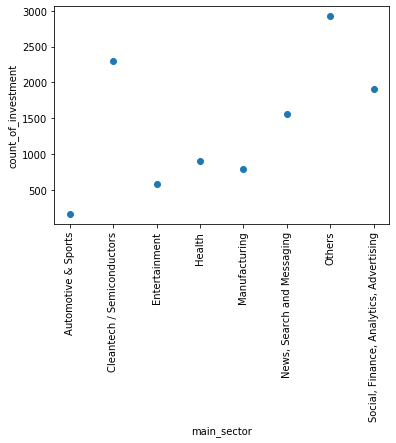

In [119]:
plt.xlabel('main_sector')
plt.ylabel('count_of_investment')
plt.scatter(x=d1_count['main_sector'],y=d1_count['count_of_investment'])
plt.xticks(rotation=90)
plt.show()

In [76]:
d1=pd.merge(d1,d1_count,on='main_sector')
d1.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector,count_of_investment
0,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,Entertainment,580
1,/organization/chefs-feed,ChefsFeed,http://www.chefsfeed.com,Media,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,26-02-2015,5000000.0,Entertainment,580
2,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media,acquired,USA,NY,New York City,New York,09-05-2005,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,01-08-2006,5000000.0,Entertainment,580
3,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media,acquired,USA,NY,New York City,New York,09-05-2005,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,01-09-2007,5000000.0,Entertainment,580
4,/organization/matchmine,MatchMine,http://matchmine.com,Media,closed,USA,MA,Boston,Needham,01-01-2007,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,01-09-2007,10000000.0,Entertainment,580


In [77]:
#The total amount invested in each main sector for USA
d1_group = d1.groupby(by='main_sector',as_index=False)
d1_sum = pd.DataFrame(d1_group['raised_amount_usd'].sum())
d1_sum.rename(columns={'raised_amount_usd':'total_amount_of_investment'},inplace=True)
d1_sum['total_amount_of_investment']=d1_sum['total_amount_of_investment'].apply(lambda x: '{:.1f}'.format(x))
d1_sum

,main_sector,total_amount_of_investment
0,Automotive & Sports,1454104361.0
1,Cleantech / Semiconductors,21181003033.0
2,Entertainment,5000212982.0
3,Health,8200859357.0
4,Manufacturing,7258553378.0
5,"News, Search and Messaging",13796816094.0
6,Others,26089280296.0
7,"Social, Finance, Analytics, Advertising",16680695048.0


In [78]:
d1=pd.merge(d1,d1_sum,on='main_sector')
d1.head(8)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector,count_of_investment,total_amount_of_investment
0,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,Entertainment,580,5000212982.0
1,/organization/chefs-feed,ChefsFeed,http://www.chefsfeed.com,Media,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,26-02-2015,5000000.0,Entertainment,580,5000212982.0
2,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media,acquired,USA,NY,New York City,New York,09-05-2005,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,01-08-2006,5000000.0,Entertainment,580,5000212982.0
3,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media,acquired,USA,NY,New York City,New York,09-05-2005,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,01-09-2007,5000000.0,Entertainment,580,5000212982.0
4,/organization/matchmine,MatchMine,http://matchmine.com,Media,closed,USA,MA,Boston,Needham,01-01-2007,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,01-09-2007,10000000.0,Entertainment,580,5000212982.0
5,/organization/mediabong,MEDIABONG,http://www.mediabong.com,Media,operating,USA,NY,New York City,New York,30-05-2011,/funding-round/9282890ca87072025dc1807f400acee6,venture,13-05-2015,5000000.0,Entertainment,580,5000212982.0
6,/organization/newscorporation,News Corp,http://www.newscorp.com,Media,ipo,USA,NY,New York City,New York,01-01-2013,/funding-round/8f6d7c4592e43e91e8688ba342bffcb7,venture,08-01-2010,12500000.0,Entertainment,580,5000212982.0
7,/organization/nokeena,Ankeena Networks,http://www.ankeena.com,Media,acquired,USA,CA,SF Bay Area,Santa Clara,01-01-2008,/funding-round/9225f2db6b1b74892d5de6a8744b94ea,venture,08-08-2008,9400000.0,Entertainment,580,5000212982.0


In [79]:
#The total number (or count) of investments for each main sector for GBR
d2_group = d2.groupby(by='main_sector',as_index=False)
d2_count = pd.DataFrame(d2_group['raised_amount_usd'].count())
d2_count.rename(columns={'raised_amount_usd':'count_of_investment'},inplace=True)
d2_count

,main_sector,count_of_investment
0,Automotive & Sports,16
1,Cleantech / Semiconductors,127
2,Entertainment,54
3,Health,24
4,Manufacturing,42
5,"News, Search and Messaging",73
6,Others,143
7,"Social, Finance, Analytics, Advertising",98


In [80]:
d2=pd.merge(d2,d2_count,on='main_sector')
d2.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector,count_of_investment
0,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,Entertainment,54
1,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,Entertainment,54
2,/organization/eutechnyx,Eutechnyx,http://press.eutechnyx.com,Games,operating,GBR,E5,Gateshead,Gateshead,01-01-1987,/funding-round/d2fc787fbc5e4f468dff8b2c557993f1,venture,13-05-2010,8800000.0,Entertainment,54
3,/organization/mind-candy,Mind Candy,http://www.mindcandy.com,Games,operating,GBR,H9,London,London,01-01-2003,/funding-round/47df01ed44d7b5916159051e5e32391e,venture,01-06-2011,10000000.0,Entertainment,54
4,/organization/mind-candy,Mind Candy,http://www.mindcandy.com,Games,operating,GBR,H9,London,London,01-01-2003,/funding-round/c6a873b4cbdd7ea3d023a771bd3b2f99,venture,23-11-2006,10860000.0,Entertainment,54


In [81]:
#The total amount invested in each main sector for G.B.R.
d2_group = d2.groupby(by='main_sector',as_index=False)
d2_sum = pd.DataFrame(d2_group['raised_amount_usd'].sum())
d2_sum.rename(columns={'raised_amount_usd':'total_amount_of_investment'},inplace=True)
d2_sum['total_amount_of_investment']=d2_sum['total_amount_of_investment'].apply(lambda x: '{:.1f}'.format(x))
d2_sum

,main_sector,total_amount_of_investment
0,Automotive & Sports,167051565.0
1,Cleantech / Semiconductors,1136905008.0
2,Entertainment,461511059.0
3,Health,214537510.0
4,Manufacturing,361940335.0
5,"News, Search and Messaging",615746235.0
6,Others,1249124289.0
7,"Social, Finance, Analytics, Advertising",821888357.0


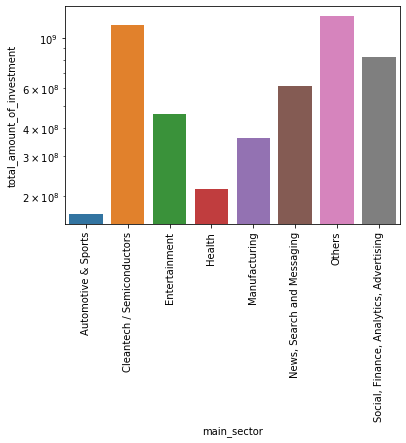

In [122]:
sns.barplot(d2_sum['main_sector'], d2_sum['total_amount_of_investment'])
plt.xticks(rotation=90)
plt.yscale('log')

In [82]:
d2=pd.merge(d2,d2_sum,on='main_sector')
d2.head(8)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector,count_of_investment,total_amount_of_investment
0,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,Entertainment,54,461511059.0
1,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,Entertainment,54,461511059.0
2,/organization/eutechnyx,Eutechnyx,http://press.eutechnyx.com,Games,operating,GBR,E5,Gateshead,Gateshead,01-01-1987,/funding-round/d2fc787fbc5e4f468dff8b2c557993f1,venture,13-05-2010,8800000.0,Entertainment,54,461511059.0
3,/organization/mind-candy,Mind Candy,http://www.mindcandy.com,Games,operating,GBR,H9,London,London,01-01-2003,/funding-round/47df01ed44d7b5916159051e5e32391e,venture,01-06-2011,10000000.0,Entertainment,54,461511059.0
4,/organization/mind-candy,Mind Candy,http://www.mindcandy.com,Games,operating,GBR,H9,London,London,01-01-2003,/funding-round/c6a873b4cbdd7ea3d023a771bd3b2f99,venture,23-11-2006,10860000.0,Entertainment,54,461511059.0
5,/organization/mobango,Mobango,http://www.mobango.com,Games,operating,GBR,H9,London,London,01-01-2006,/funding-round/a5c15d027c10bdd8b024823722940b9a,venture,31-03-2008,5700000.0,Entertainment,54,461511059.0
6,/organization/naturalmotion,NaturalMotion,http://naturalmotion.com,Games,acquired,GBR,K2,London,Oxford,01-01-2001,/funding-round/c228343f250a8e67272fd6bf38fd67c3,venture,21-06-2012,11000000.0,Entertainment,54,461511059.0
7,/organization/outplay-entertainment,Outplay Entertainment,http://outplay.com/,Games,operating,GBR,U3,Dundee,Dundee,01-01-2010,/funding-round/a4a704f394f2834cdfef60e2a5d4985b,venture,28-05-2014,5000000.0,Entertainment,54,461511059.0


In [83]:
#The total number (or count) of investments for each main sector for IND.
d3_group = d3.groupby(by='main_sector',as_index=False)
d3_count = pd.DataFrame(d3_group['raised_amount_usd'].count())
d3_count.rename(columns={'raised_amount_usd':'count_of_investment'},inplace=True)
d3_count

,main_sector,count_of_investment
0,Automotive & Sports,13
1,Cleantech / Semiconductors,20
2,Entertainment,33
3,Health,19
4,Manufacturing,21
5,"News, Search and Messaging",52
6,Others,109
7,"Social, Finance, Analytics, Advertising",32


In [84]:
d3=pd.merge(d3,d3_count,on='main_sector')
d3.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector,count_of_investment
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Entertainment,33
1,/organization/dhruva,Dhruva,http://www.dhruva.com/,Games,operating,IND,19,Bangalore,Bangalore,01-01-1997,/funding-round/6035248811c9530b11bd442d9239a0b1,venture,27-11-2006,5000000.0,Entertainment,33
2,/organization/games2win,Games2Win,http://www.games2win.com,Games,operating,IND,16,Mumbai,Mumbai,01-01-2005,/funding-round/6b024f4906c288c66d1df966e6aeb256,venture,29-03-2007,5000000.0,Entertainment,33
3,/organization/games2win,Games2Win,http://www.games2win.com,Games,operating,IND,16,Mumbai,Mumbai,01-01-2005,/funding-round/b095563fd43d1e4fd16da3f4bcd040af,venture,30-03-2011,6000000.0,Entertainment,33
4,/organization/pokkt,POKKT,http://www.pokkt.com,Games,operating,IND,16,Mumbai,Mumbai,01-08-2012,/funding-round/adb94c131e001a7438a4695d873d8dc1,venture,03-11-2015,5000000.0,Entertainment,33


In [85]:
#The total amount invested in each main sector for IND
d3_group = d3.groupby(by='main_sector',as_index=False)
d3_sum = pd.DataFrame(d3_group['raised_amount_usd'].sum())
d3_sum.rename(columns={'raised_amount_usd':'total_amount_of_investment'},inplace=True)
d3_sum['total_amount_of_investment']=d3_sum['total_amount_of_investment'].apply(lambda x: '{:.1f}'.format(x))
d3_sum

,main_sector,total_amount_of_investment
0,Automotive & Sports,136900000.0
1,Cleantech / Semiconductors,165380000.0
2,Entertainment,280830000.0
3,Health,167740000.0
4,Manufacturing,200900000.0
5,"News, Search and Messaging",433834545.0
6,Others,1007409507.0
7,"Social, Finance, Analytics, Advertising",290543500.0


In [86]:
d3=pd.merge(d3,d3_sum,left_on='main_sector',right_on='main_sector')
d3.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector,count_of_investment,total_amount_of_investment
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Entertainment,33,280830000.0
1,/organization/dhruva,Dhruva,http://www.dhruva.com/,Games,operating,IND,19,Bangalore,Bangalore,01-01-1997,/funding-round/6035248811c9530b11bd442d9239a0b1,venture,27-11-2006,5000000.0,Entertainment,33,280830000.0
2,/organization/games2win,Games2Win,http://www.games2win.com,Games,operating,IND,16,Mumbai,Mumbai,01-01-2005,/funding-round/6b024f4906c288c66d1df966e6aeb256,venture,29-03-2007,5000000.0,Entertainment,33,280830000.0
3,/organization/games2win,Games2Win,http://www.games2win.com,Games,operating,IND,16,Mumbai,Mumbai,01-01-2005,/funding-round/b095563fd43d1e4fd16da3f4bcd040af,venture,30-03-2011,6000000.0,Entertainment,33,280830000.0
4,/organization/pokkt,POKKT,http://www.pokkt.com,Games,operating,IND,16,Mumbai,Mumbai,01-08-2012,/funding-round/adb94c131e001a7438a4695d873d8dc1,venture,03-11-2015,5000000.0,Entertainment,33,280830000.0


### count of total no. of investments in the top 3 countries###

In [87]:
#total number of investments for country 1 i.e. USA
d1_count['count_of_investment'].sum()

11149

In [88]:
#total number of investments for country 1 i.e. GBR
d2_count['count_of_investment'].sum()

577

In [89]:
#total number of investments for country 1 i.e. India
d3_count['count_of_investment'].sum()

299

### Total amount of Investments###

In [90]:
#total sum of investments for country 1 i.e. USA
d1_sum['total_amount_of_investment']=d1_sum['total_amount_of_investment'].astype(dtype=np.float)
d1_sum['total_amount_of_investment'].sum()


99661524549.0

In [91]:
#total sum of investments for country 2 i.e. GBR
d2_sum['total_amount_of_investment']=d2_sum['total_amount_of_investment'].astype(dtype=np.float)
d2_sum['total_amount_of_investment'].sum()

5028704358.0

In [92]:
#total sum of investments for country 3 i.e. IND
d3_sum['total_amount_of_investment']=d3_sum['total_amount_of_investment'].astype(dtype=np.float)
d3_sum['total_amount_of_investment'].sum()

2683537552.0

### Top sector (based on count of investments)###

In [93]:
#Top sectors on behalf of count of investments in USA
d1_count.sort_values(by='count_of_investment',ascending=False).head(3)

,main_sector,count_of_investment
6,Others,2923
1,Cleantech / Semiconductors,2297
7,"Social, Finance, Analytics, Advertising",1912


In [94]:
#Top sectors on behalf of count of investments in GBR
d2_count.sort_values(by='count_of_investment',ascending=False).head(3)

,main_sector,count_of_investment
6,Others,143
1,Cleantech / Semiconductors,127
7,"Social, Finance, Analytics, Advertising",98


In [95]:
#Top sectors on behalf of count of investments in IND.
d3_count.sort_values(by='count_of_investment',ascending=False).head(3)

,main_sector,count_of_investment
6,Others,109
5,"News, Search and Messaging",52
2,Entertainment,33


In [96]:
#Highest investment recd. by a company in TOP SECTOR (USA)

d1[d1['main_sector']=='Others'].groupby(by='name').sum().sort_values(by='raised_amount_usd',ascending=False).head(1)

,raised_amount_usd,count_of_investment
name,,
Virtustream,64300000.0,17538


In [97]:
#Highest investment recd. by a company in TOP SECTOR (GBR)
d2[d2['main_sector']=='Others'].groupby(by='name').sum().sort_values(by='raised_amount_usd',ascending=False).head(1)

,raised_amount_usd,count_of_investment
name,,
Electric Cloud,37000000.0,572


In [98]:
#Highest investment recd. by a company in TOP SECTOR (IND)
d3[d3['main_sector']=='Others'].groupby(by='name').sum().sort_values(by='raised_amount_usd',ascending=False).head(1)

,raised_amount_usd,count_of_investment
name,,
FirstCry.com,39000000.0,327


### For the second-best sector count-wise, which company received the highest investment?###

In [99]:
#Highest investment recd. by a company in First BEST SECTOR (USA)
d1[d1['main_sector']=='Cleantech / Semiconductors'].groupby(by='name').sum().sort_values(by='raised_amount_usd',ascending=False).head(1)

,raised_amount_usd,count_of_investment
name,,
Biodesix,75300000.0,18376


In [100]:
#Highest investment recd. by a company in SECOND BEST SECTOR (GBR)
d2[d2['main_sector']=='Cleantech / Semiconductors'].groupby(by='name').sum().sort_values(by='raised_amount_usd',ascending=False).head(1)

,raised_amount_usd,count_of_investment
name,,
EUSA Pharma,35600000.0,381


In [101]:
#Highest investment recd. by a company in Third BEST SECTOR (IND)
d3[d3['main_sector']=='News, Search and Messaging'].groupby(by='name').sum().sort_values(by='raised_amount_usd',ascending=False).head(1)

,raised_amount_usd,count_of_investment
name,,
GupShup,33000000.0,156


In [132]:
funding_type = ['private_equity','seed','venture']
master_frame=master_frame[master_frame['funding_round_type'].isin(funding_type)]
master_group_plot=master_frame.groupby(by='funding_round_type')
df_plot1 = pd.DataFrame(master_group_plot['raised_amount_usd'].sum())

df_plot2=pd.DataFrame(master_group_plot['raised_amount_usd'].mean())

new_df = pd.DataFrame(round(100*(df_plot1['raised_amount_usd'])/sum(df_plot1['raised_amount_usd']),2))
new_df

,raised_amount_usd
funding_round_type,
private_equity,18.95
seed,2.27
venture,78.78


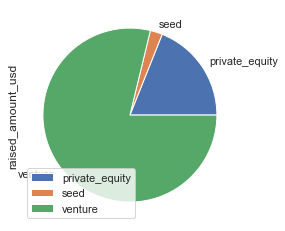

In [135]:
new_df.plot.pie(y='raised_amount_usd')

### A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type.###

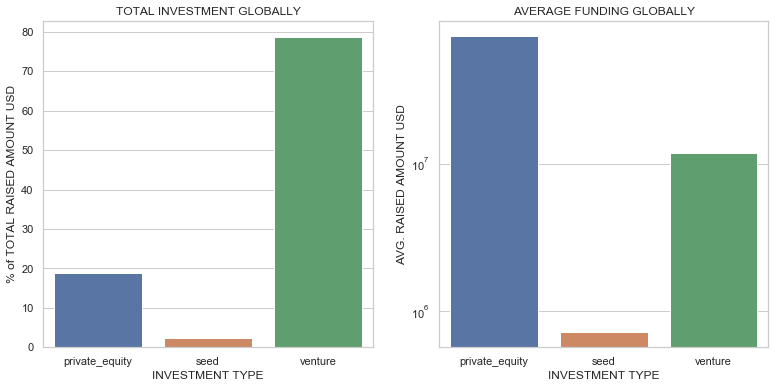

In [133]:
sns.set(style="whitegrid")
plt.figure(figsize=(13,6))
plt.subplot(1, 2, 1)
st = sns.barplot(x=new_df.index,y='raised_amount_usd',data=new_df,ci=None)
st.set(xlabel='INVESTMENT TYPE', ylabel='% of TOTAL RAISED AMOUNT USD',title='TOTAL INVESTMENT GLOBALLY')
#plt.yscale('log')
plt.subplot(1, 2, 2)
st = sns.barplot(x=df_plot2.index,y='raised_amount_usd',data=df_plot2,ci=None,)
st.set(xlabel='INVESTMENT TYPE', ylabel='AVG. RAISED AMOUNT USD',title='AVERAGE FUNDING GLOBALLY')
plt.yscale('log')
plt.show()

###  A plot showing the top 9 countries against the total amount of investments of funding type FT.###

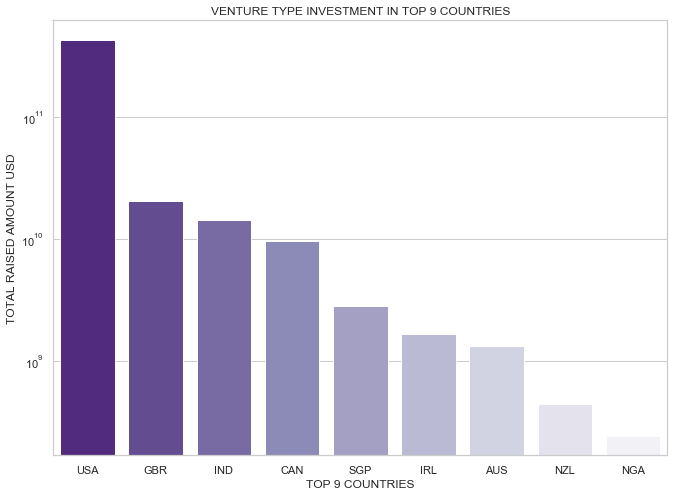

In [149]:
sns.set(style="whitegrid")
plt.figure(figsize=(11,8))
top9['raised_amount_usd'] = top9['raised_amount_usd'].astype(np.float64)
st = sns.barplot(x=top9.index, y="raised_amount_usd",data=top9,ci=None,palette="Purples_r")
st.set(xlabel='TOP 9 COUNTRIES', ylabel='TOTAL RAISED AMOUNT USD',title='VENTURE TYPE INVESTMENT IN TOP 9 COUNTRIES')
plt.yscale('log')
